In [239]:
import bt
import ffn
import pandas as pd
import numpy as np

%matplotlib inline


In [296]:
# download price data from Yahoo! Finance. By default,
# the Adj. Close will be used.
data = ffn.get('0050.tw', start='2018-01-01')
perf = data.calc_stats()

<AxesSubplot:title={'center':'Equity Progression'}, xlabel='Date'>

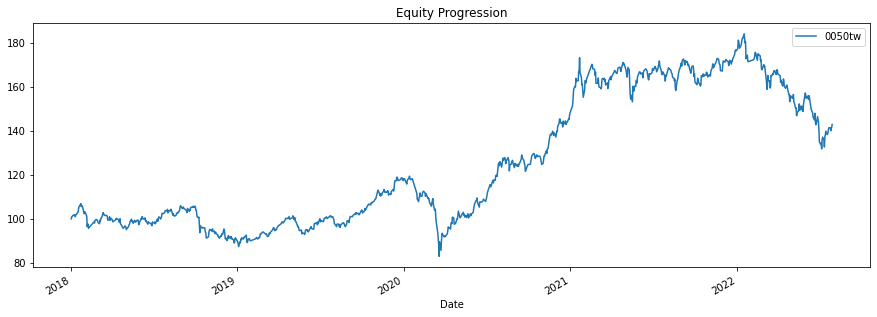

In [297]:
perf.plot()

In [298]:
perf.display()

Stat                 0050tw
-------------------  ----------
Start                2018-01-02
End                  2022-07-29
Risk-free rate       0.00%

Total Return         42.86%
Daily Sharpe         0.53
Daily Sortino        0.84
CAGR                 8.12%
Max Drawdown         -30.48%
Calmar Ratio         0.27

MTD                  1.90%
3m                   -8.35%
6m                   -16.64%
YTD                  -18.90%
1Y                   -13.55%
3Y (ann.)            12.24%
5Y (ann.)            8.12%
10Y (ann.)           -
Since Incep. (ann.)  8.12%

Daily Sharpe         0.53
Daily Sortino        0.84
Daily Mean (ann.)    9.84%
Daily Vol (ann.)     18.71%
Daily Skew           -0.24
Daily Kurt           5.26
Best Day             7.95%
Worst Day            -7.03%

Monthly Sharpe       0.50
Monthly Sortino      0.86
Monthly Mean (ann.)  9.04%
Monthly Vol (ann.)   18.27%
Monthly Skew         -0.13
Monthly Kurt         1.55
Best Month           15.46%
Worst Month          -14.10%

Yea

In [299]:
perf[0].display_monthly_returns()

  Year    Jan    Feb     Mar    Apr    May     Jun    Jul    Aug    Sep     Oct    Nov    Dec     YTD
------  -----  -----  ------  -----  -----  ------  -----  -----  -----  ------  -----  -----  ------
  2018   2.48  -2.72    0.61  -3.44   0.94    0.87   5.03   1.64  -0.06  -10.76  -1.03  -1.63   -8.6
  2019  -1.52   4.44    1.93   4.61  -5.25    3.12   2.35  -1.15   3.36    6.5    1.55   5.96   28.41
  2020  -7.22  -1.45  -14.1   12.28  -1.23    6.45  15.46  -1.93   1.18    0     10      7.9    26.1
  2021   4.87   4.06    1.01   4.34  -2.49    1.35  -2.09   3.16  -2.35   -0.91   1.62   5.43   19.02
  2022  -2.71  -2.15   -0.29  -6.77   0.82  -10.79   1.9    0      0       0      0      0     -18.9


In [300]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance(),
                       bt.algos.CapitalFlow(15000)]
               )

In [301]:
comm = lambda q, p: q * p * 0.0020

# create a backtest and run it
test = bt.Backtest(s, data, initial_capital=500000, commissions=comm)
res = bt.run(test)
res.values

<function Result.values>

<AxesSubplot:title={'center':'Equity Progression'}>

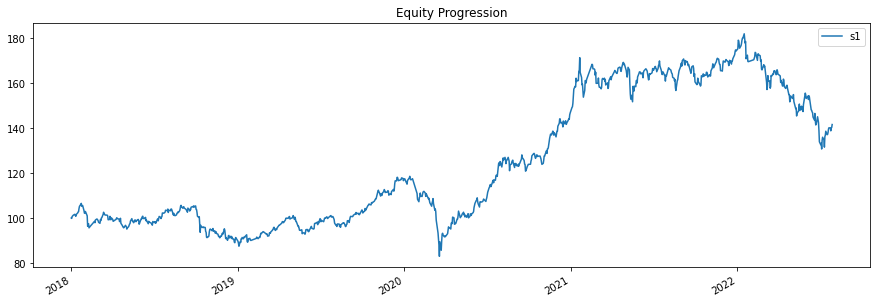

In [302]:
res.plot()

In [303]:
res.display()

Stat                 s1
-------------------  ----------
Start                2018-01-01
End                  2022-07-29
Risk-free rate       0.00%

Total Return         41.56%
Daily Sharpe         0.52
Daily Sortino        0.83
CAGR                 7.90%
Max Drawdown         -30.02%
Calmar Ratio         0.26

MTD                  1.92%
3m                   -8.24%
6m                   -16.49%
YTD                  -18.74%
1Y                   -13.45%
3Y (ann.)            12.04%
5Y (ann.)            7.90%
10Y (ann.)           -
Since Incep. (ann.)  7.90%

Daily Sharpe         0.52
Daily Sortino        0.83
Daily Mean (ann.)    9.57%
Daily Vol (ann.)     18.41%
Daily Skew           -0.23
Daily Kurt           5.22
Best Day             7.79%
Worst Day            -6.86%

Monthly Sharpe       0.49
Monthly Sortino      0.85
Monthly Mean (ann.)  8.85%
Monthly Vol (ann.)   17.98%
Monthly Skew         -0.13
Monthly Kurt         1.55
Best Month           15.22%
Worst Month          -13.86%

Yearly 

<AxesSubplot:>

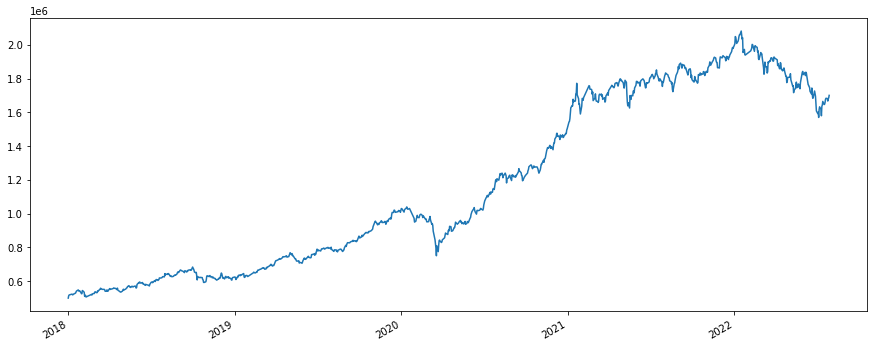

In [304]:
# strategy value overtime
res.backtest_list[0].strategy.values.plot(figsize=(15, 6))

In [305]:
res.backtest_list[0].strategy.values

2018-01-01    5.000000e+05
2018-01-02    5.140020e+05
2018-01-03    5.185328e+05
2018-01-04    5.194389e+05
2018-01-05    5.209492e+05
                  ...     
2022-07-25    1.681747e+06
2022-07-26    1.666751e+06
2022-07-27    1.681747e+06
2022-07-28    1.684604e+06
2022-07-29    1.700314e+06
Name: value, Length: 1113, dtype: float64